In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

ncaa = pd.read_csv('cbb.csv')
ncaa.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,TWO_P_O,TWO_P_D,THREE_P_O,THREE_P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [4]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
ncaa = pd.get_dummies(ncaa)
ncaa.head()
### END SOLUTION

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,CONF_WAC,CONF_WCC,POSTSEASON_2ND,POSTSEASON_Champions,POSTSEASON_E8,POSTSEASON_F4,POSTSEASON_R32,POSTSEASON_R64,POSTSEASON_R68,POSTSEASON_S16
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,...,0,0,1,0,0,0,0,0,0,0
1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,...,0,0,1,0,0,0,0,0,0,0
2,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,...,0,0,1,0,0,0,0,0,0,0
3,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,...,0,0,1,0,0,0,0,0,0,0
4,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,...,0,1,1,0,0,0,0,0,0,0


In [5]:
# Drop extra dummy columns

### BEGIN SOLUTION
ncaa = ncaa.drop(columns=['EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD'])
ncaa.head()
### END SOLUTION

,G,W,ADJOE,ADJDE,BARTHAG,TWO_P_O,TWO_P_D,THREE_P_O,THREE_P_D,ADJ_T,...,CONF_WAC,CONF_WCC,POSTSEASON_2ND,POSTSEASON_Champions,POSTSEASON_E8,POSTSEASON_F4,POSTSEASON_R32,POSTSEASON_R64,POSTSEASON_R68,POSTSEASON_S16
0,40,33,123.3,94.9,0.9531,53.9,44.6,32.7,36.2,71.7,...,0,0,1,0,0,0,0,0,0,0
1,40,36,129.1,93.6,0.9758,54.8,44.7,36.5,37.5,59.3,...,0,0,1,0,0,0,0,0,0,0
2,40,33,114.4,90.4,0.9375,54.7,46.8,35.2,33.2,65.9,...,0,0,1,0,0,0,0,0,0,0
3,38,31,115.2,85.2,0.9696,52.8,41.9,36.5,29.7,67.5,...,0,0,1,0,0,0,0,0,0,0
4,39,37,117.8,86.3,0.9728,56.3,40.0,38.2,29.0,71.5,...,0,1,1,0,0,0,0,0,0,0


In [26]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = ncaa[['ADJOE', 'TWO_P_O', 'THREE_P_O']]
y = ncaa['W'].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(1757, 3) (1757, 1)


In [27]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [28]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [29]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [30]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

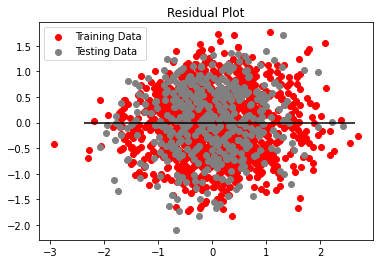

In [31]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="red", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="gray", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [32]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45495525280013493, R2: 0.5301996072074513


In [33]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45350965428072565, R2: 0.5316923754479734


In [34]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4549551689993799, R2: 0.5301996937426157


In [35]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4541266251921546, R2: 0.5310552728433835
